### Establecer carpetas de trabajo y constantes
Los notebboks pueden usarse tanto en Colab como con una instalacción local Windows/Linux Como estrategia de trabajo.
Ejemplo de estructura de carpetas para trabajo local en Windows/Linux.
```
RNA
├── DATOS/
├── FUENTES/
└── Práctica 1/
    ├── Práctica 1.pdf
    └── Notebooks/
        └── Ejercicio 1.ipynb
```

Para trabajar en Colab se utiliza la carpeta *"content/drive/MyDrive/Colab Notebooks"* para almacenar FUENTES y DATOS.
Para poder acceder a esta carpeta se debe montar GDrive y aceptar darle los permisoscorrespondientes.

El siguiente cóodigo detecta si el entorno de trabajo es Colab o local y establece constantes con las rutas correspondientes.

In [ ]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Ejercicio a resolver
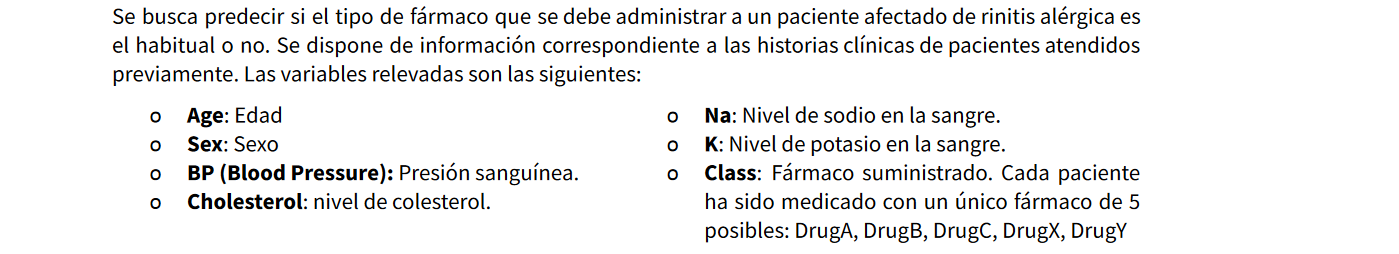

### Importación de paquetes a utilzar

In [ ]:
import pandas as pd
import numpy as np

from sklearn import model_selection, preprocessing, metrics
from ClassPerceptron import Perceptron  # importa clase preceptron de Laura

from matplotlib import pylab as plt

pd.set_option('future.no_silent_downcasting', True) # Deshabilita warnings de funcion dataframe.replace

### Carga de datos y numerización

In [ ]:
# Leer los datos de entrenamiento y de testeo
df_train = pd.read_csv(DATOS_DIR+'drugs_train.csv')
print('Cant.de ejemplos de entrenamiento: ', len(df_train))

df_test = pd.read_csv(DATOS_DIR+'drugs_test.csv')
print('Cant.de ejemplos de testeo.......: ', len(df_test),'\n')

# Imprimir las primeras filas del dataframe
print(df_train.head())

Cant.de ejemplos de entrenamiento:  160
Cant.de ejemplos de testeo.......:  40 

   Age Sex    BP Cholesterol        Na         K   Drug
0   16   M   LOW        HIGH  0.743021  0.061886  drugC
1   42   F  HIGH        HIGH  0.533228  0.025348  drugY
2   33   F   LOW        HIGH  0.858387  0.025634  drugY
3   47   M   LOW        HIGH  0.697269  0.068944  drugC
4   56   F  HIGH        HIGH  0.750962  0.029571  drugY


### Reemplazo de valores nominales por valores numéricos

In [ ]:
#-- ordinales a numericos ---
# diccionarios de reemplazo de atributos
# clave del primer diccionario es nombre del atributo del dataset
# clave del segundo diccionario es el valor a reemplazar
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0},
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

# aplica los remplazos en el dataset de entrenamiento
df_train.replace(mapeo, inplace=True)
print(df_train.head())

   Age Sex BP Cholesterol        Na         K   Drug
0   16   0  0           1  0.743021  0.061886  drugC
1   42   1  2           1  0.533228  0.025348  drugY
2   33   1  0           1  0.858387  0.025634  drugY
3   47   0  0           1  0.697269  0.068944  drugC
4   56   1  2           1  0.750962  0.029571  drugY


In [ ]:
# aplica los remplazos en el dataset de entrenamiento
df_test.replace(mapeo, inplace=True)
print(df_test.head())

   Age Sex BP Cholesterol        Na         K   Drug
0   47   1  0           1  0.539774  0.053620  drugC
1   49   0  0           0  0.625889  0.056828  drugX
2   50   0  2           1  0.518285  0.069193  drugA
3   32   1  1           1  0.549375  0.073474  drugX
4   40   0  2           1  0.557133  0.020022  drugY


### Preparación de Datos de Entrenamiento y Prueba

In [ ]:
#--- DATOS DE ENTRENAMIENTO ---
X_train = np.array(df_train.iloc[:,:-1])
T_train = np.array((df_train['Drug'] == 'drugY') * 1) # La multiplicación transforma Booleanos en enteros

X_test = np.array(df_test.iloc[:,:-1])
T_test = np.array((df_test['Drug'] == 'drugY') * 1) # La multiplicación transforma Booleanos en enteros

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    if normalizarEntrada==1:  #--- Normalización lineal entre 0 y 1 ---
        normalizador = preprocessing.MinMaxScaler()
    else: # Normaliza utilizando la media y el desvio
        normalizador= preprocessing.StandardScaler()

    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

### Entrenamiento del Modelo

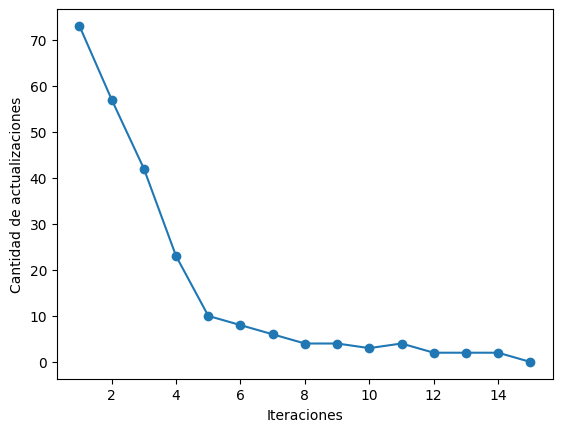

In [ ]:
ppn = Perceptron(alpha=0.005, n_iter=650, random_state=40)
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

### Prueba del Modelo

In [ ]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  38
% de aciertos = 95.00 %


### Calcula Métricas

In [ ]:
MM = metrics.confusion_matrix(T_test,Y_test)
print("Matriz de confusión:\n%s" % MM)

report = metrics.classification_report(T_test,Y_test)
print("\nResultado de la clasificación:\n%s" % report)

accuracy = metrics.accuracy_score(T_test,Y_test)
print("\nAccuracy: ", 100*accuracy, '%')

print(np.sum(T_train))
print(np.sum(T_test))

Matriz de confusión:
[[20  2]
 [ 0 18]]

Resultado de la clasificación:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.90      1.00      0.95        18

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40


Accuracy:  95.0 %
73
18


---
## Prueba combinaciones de numerización y normalización, mostrando los datos en una tabla
La función **numerizar_datos** aplica a un dataframe la numerización o binarización del atributo objetivo (0/1 o one/hot)

In [ ]:
# Leer los datos de entrenamiento y de testeo
df_train = pd.read_csv(DATOS_DIR+'drugs_train.csv')
print('Cant.de ejemplos de entrenamiento: ', len(df_train))
df_test = pd.read_csv(DATOS_DIR+'drugs_test.csv')
print('Cant.de ejemplos de testeo.......: ', len(df_test))

def numerizar_datos(df, codificacion):
    # recibe un dataframe y retorna un arreglo numpy con los atributos transformados
    # segun el mapeo. Tambien retorna la clase (1/0) dependiendo si la droga es drugY o no
    if codificacion == 'numeros':  # Codificación numérica
        mapeo = {'Sex': {'F': 1, 'M': 0},
                 'BP': {'HIGH': 2, 'NORMAL': 1, 'LOW': 0},
                 'Cholesterol': {'NORMAL': 0, 'HIGH': 1}}

        df_map = df.replace(mapeo).infer_objects(copy=False)

        X = np.array(df_map.iloc[:, :-1])
        T = np.array((df_map['Drug'] == 'drugY') * 1)
        return X, T
    else:  # Codificación dummy (one-hot encoding)
        X = pd.get_dummies(df.drop('Drug', axis=1)) * 1
        T = np.array((df['Drug'] == 'drugY') * 1)
        return X.values, T


Cant.de ejemplos de entrenamiento:  160
Cant.de ejemplos de testeo.......:  40


### Encabezado de Tabla

In [ ]:
# Prepara un string para acumular los resultados
# Encabezados de la tabla
tabla = "\n" \
        "|  Normalización|  Codificación |  Iteraciones  |    Aciertos   |\n" \
        "|               |               |               |Prueba |Entrena|\n"



El siguiente código está diseñado para que en cada corrida agregue los datos a una tabla con la configuración de la corrida

In [ ]:
# -- configuraciones para pruebas--
#NORMALIZACION = 'no'
NORMALIZACION = 'lineal'
#NORMALIZACION = 'estandar'
CODIFICACION = 'numeros'  # codificacion de salida: 0/1
#CODIFICACION = 'dummy'    # codificacion de salida: one hot

ALFA = 0.01
MAX_ITE = 200


(X_train, Y_train) = numerizar_datos(df_train, CODIFICACION)
(X_test, Y_test) = numerizar_datos(df_train, CODIFICACION)

# normalizacón
if NORMALIZACION == 'no':
    scaler = None
elif NORMALIZACION == "lineal":
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# crea perceptrón y entrena
ppn = Perceptron(alpha=ALFA, n_iter=MAX_ITE)
ppn.fit(X_train, Y_train)
iter = len(ppn.errors_)

# realiza prueba y calcula exactitud
Y_train_pred = ppn.predict(X_train)
aciertos_train = metrics.accuracy_score(Y_train, Y_train_pred)
Y_test_pred = ppn.predict(X_test)
aciertos_test = metrics.accuracy_score(Y_test, Y_test_pred)


# Imprime los resultados en forma de tabla
tabla = tabla + "|{:^15}|{:^15}|{:^15}|{:^7.3f}|{:^7.3f}|\n".format(
                    NORMALIZACION, CODIFICACION, iter, aciertos_test, aciertos_train)

# imprime estring con resultados acumulados
print(tabla)


|  Normalización|  Codificación |  Iteraciones  |    Aciertos   |
|               |               |               |Prueba |Entrena|
|    lineal     |     dummy     |      108      | 1.000 | 1.000 |
|    lineal     |     dummy     |      16       | 1.000 | 1.000 |
|    lineal     |     dummy     |      17       | 1.000 | 1.000 |
|    lineal     |     dummy     |      34       | 1.000 | 1.000 |
|    lineal     |    numeros    |      15       | 1.000 | 1.000 |
|    lineal     |    numeros    |      22       | 1.000 | 1.000 |
|    lineal     |    numeros    |      14       | 1.000 | 1.000 |
|    lineal     |    numeros    |      17       | 1.000 | 1.000 |
|    lineal     |    numeros    |      28       | 1.000 | 1.000 |
|    lineal     |    numeros    |      15       | 1.000 | 1.000 |
|    lineal     |    numeros    |      32       | 1.000 | 1.000 |
|    lineal     |    numeros    |      21       | 1.000 | 1.000 |

